<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/AD000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

算法本身只是一个outlier的检测，至于这个outlier是不是异常或者说是故障，要结合业务来考虑。

# 基于分布：
根据数据的分布特点，选择一个概率分布模型对数据进行匹配，将不能匹配的数据点识别为离群点。


优点：

统计方法广泛。

缺点：

在高维数据上的应用效果不够理想；

实际数据分布规律无法预估，难以用单一的分布模型来刻画。


## 3sigma

3σ准则又称拉依达准则，是指先假设一组检测数据只含有随机误差，对其进行计算处理得到标准偏差，按一定概率确定一个区间，认为凡超过这个区间的误差，就不属于随机误差而是粗大误差，含有该误差的数据应予以剔除。

仅局限于对正态或近似正态分布的样本数据处理，它是以测量次数充分大为前提的。



基于正态分布，3sigma准则认为超过3sigma的数据为异常点。


异常标准：值 > mu+3sigma 或 值 < mu-3sigma


## z-score

标准分数，是一维或低维特征空间中的参数异常检测方法。假定数据服从高斯分布，异常值是分布尾部的数据点，远离数据的平均值。

基于正态分布的3σ法则或z分数方法是以假定数据服从正态分布为前提的，但实际数据往往并不严格服从正态分布。

它们判断异常值的标准是以计算数据批的均值和标准差为基础的，而均值和标准差的耐抗性极小，异常值本身会对它们产生较大影响，这样产生的异常值个数不会多于总数0.7%。

显然，应用这种方法于非正态分布数据中判断异常值，其有效性是有限的。


z-score为标准分数，测量数据点和平均值的距离，若A与平均值相差2个标准差，z-score为2。

当把z-score=3作为阈值去剔除异常点时，便相当于3sigma。


异常标准：z_score > 3

## boxplot


箱线图是基于四分位距（IQR）找异常点的。

四分位距是一种被广泛接受的在数据中寻找异常值的方法。

使用四分位距或IQR时，完整数据集被分成四个相等的部分或四分位数。

四分位数之间的距离用于确定IQR。


异常标准：值 > q3+1.5IQR 或 值 < q1-1.5IQR

## grubbs假设检验


Grubbs检测，也称为最大归一化残差检测，常被用来检验服从正太分布的单变量数据集中的单个异常值。

Grubbs检测基于正态假设。也就是说，在应用Grubbs检测之前，首先应验证数据是否可以通过正态分布合理地近似。


算法流程：

1. 样本从小到大排序

2. 求样本的mean和dev

3. 计算min/max与mean的差距，更大的那个为可疑值

4. 求可疑值的z-score (standard score)，如果大于Grubbs临界值，那么就是outlier



异常标准：z_score > grubbs临界值

# 基于距离：

对某一个数据点，超过一定部分的数据与它的距离都大于一定值，那么将它识别为离群点。


优点：

方法简单，易于操作。

缺点：

对参数敏感；

时间复杂度偏高；

在高维稀疏数据集上效果不理想。





## KNN

1、算法思想

假设相似的事物在很近的距离内存在。异常点一定是跟大部分的样本点都隔得很远。
基于这个思想，我们只需要依次计算每个样本点与它最近的K个样本的平均距离，再利用计算的距离与阈值进行比较，如果大于阈值，则认为是异常点。


2、计算距离
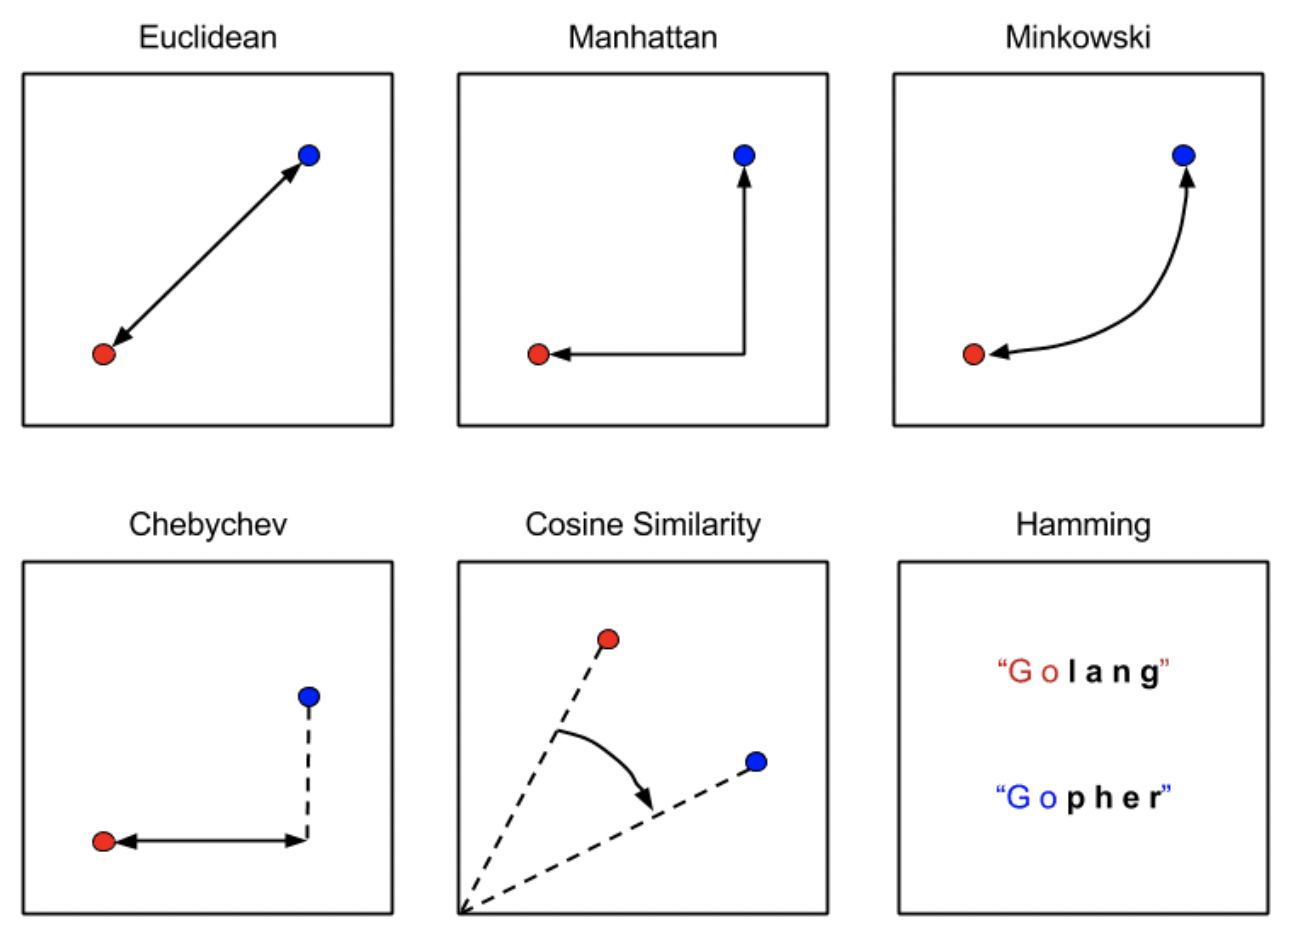

异常标准：K近邻平均距离 > 阈值

# 基于密度：

根据数据的密集情况，计算每个数据对象的局部离群因子，用以标识数据的离群程度。选出top(n)个离群程度最大的点作为离群点。


基于密度的离群点检测方法有一个基本假设：
非离群点对象周围的密度与其邻域周围的密度类似，而离群点对象周围的密度显著不同于其邻域周围的密度。


优点：

方法简洁，不受数据分布影响。

缺点：

对近邻参数较为敏感；

时间复杂度较高；

在高维大数据集上效率较低。


## LOF

LOF通过计算一个数值score来反映一个样本的异常程度。
这个数值的大致意思是：一个样本点周围的样本点所处位置的平均密度比上该样本点所在位置的密度。
比值越大于1，则该点所在位置的密度越小于其周围样本所在位置的密度，这个点就越有可能是异常点。



异常标准：LOF > 阈值


## COF

COF是LOF的变种，相比于LOF，COF可以处理低密度下的异常值，COF的局部密度是基于平均链式距离计算得到。


异常标准：COF > 阈值


## SOS


将特征矩阵（feature matrix）或者相异度矩阵（dissimilarity matrix）输入给SOS算法，会返回一个异常概率值向量（每个点对应一个）。
SOS的思想是：当一个点和其它所有点的关联度（affinity）都很小的时候，它就是一个异常点。


异常标准：异常概率 > 阈值

# 基于树：

该类方法假设我们用一个随机超平面来切割数据空间，每切一次便可以生成两个子空间。
接着继续用一个随机超平面来切割每个子空间，循环下去，直到每个子空间里面只有一个数据点为止。

1.那些密度很高的簇是需要被切很多次才能让子空间中只有一个数据点

2.那些密度很低的点的子空间则很快就被切割成只有一个数据点

此类方法不受球形邻近的限制，可以划分任意形状的异常点。

不同的方法区别主要在三个地方：特征的选取、分割点的选取和分类空间打标签的方案。


异常标准：异常得分 > 阈值

## iForest

1、算法思想

异常样本 比 正常样本 更容易快速落入叶子结点；或者说，异常样本在二叉树上，距离根结点要更近。

2、前提假设

（1）异常样本占比：不宜太多

（2）异常样本取值：尽可能和 正常样本 拉开差异


iForest只适合检测全局异常点，不适合检测局部异常点。
此方法适用于异常点较少的情况，采用构造多个决策树的方式进行异常检测。

1.对数据集进行有放回抽样，对每一次抽样出来的样本构建二叉树。

2.构建二叉树时，随机选取一个特征，然后在特征上随机选一个分割点，将该特征小于分割点的数据放在二叉树左边，反之放在右边。

3.直至二叉树达到一定深度或者叶子节点只包含一个数据点为止。

4.进行异常检测时，计算该数据点在多个二叉树上的平均深度，深度越浅，越可能是异常值。


## SCiForest

SCiForest与iForest的最大差别在于其利用超平面去划分数据集，其利用了多个特征组合划分，并且还在可选范围内选择了最佳的划分超平面，而不是像iForest一样，只是随机选单个特征。


传统iForest选择分割点后形成的分割超平面是平行于坐标轴的，SCiForest可以生成任意角度的分割超平面。


## RRCF

适用于流数据异常检测。


论文中首先就引入异常检测的两个经典问题：

如何定义异常？

采用何种数据结构在动态流式数据中高效地检测异常？

对于第一点，作者从模型复杂度的来定义：如果模型的复杂度随着该某数据点增加那么该点就是异常点，这点和 iForest 思想类似。

对于第二点，作者采用随机化的方法来检测异常，因为在监督学习中该方法被证明是有效的，这点和 Dropout 思想有点类似。

综合以上两点，就提出了随机割森林的数据流异常检测方法 RRCF。





# AIOps运维中一些常见异常检查算法



## 1 前言


运维日常中其实利用到了很多异常检测算法、经验、架构等等。
本文会重点介绍一下，场景、原理、如何使用、如何实现等等。
整体来说没有任何一种算法是完美的，所有的算法都有它的特点和需要解决的问题。
很多时候是需要多种算法组合来完成的。





## 2 场景介绍

最常见的就是设定阈值、同比、环比算法这三种。
这三种算法其实可以解决日常检测中的80%以上的问题。


算法不在多复杂，而在于多实用。


阈值的场景：比如sla、失败率、错误码等等。因为这种数量平时就非常少一旦有应该就是有问题，需要及时报警出来处理。

同比的场景：主要是容量、流量、延迟缓慢退化的情况。这种时序周期性的变化。需要跟昨天、上周等作出对比。

环比的场景：主要是容量、流量、延迟退化的情况。这种发现有突增突降的情况。

组合场景：
比如缓慢下降不确定是自然变化场景和系统异常。这个时候就需要多个指标去同时判断。

复杂场景：
抖动，比如一些抖动场景，有时间需要剔除的比如采集的问题、或者网络抖动的问题。这个需要达到一定的阈值或者频率再报警出来。
缓慢下降的问题。这个问题靠阈值是发现不了的。如果靠同比和环比，时间会很长。

整体来说分为三个阶段：

1) 单指标检测：常见的异常发现和异常监控

2) 指标和指标的关系挖掘：多指标关联定位

3) 指标和事件关系挖掘：根因定位，和可疑事件推荐

4) 事件与事件的关系挖掘：相关预案的推荐


## 3 算法介绍

场景1：突增突降，关心突变的数据，典型场景：交易订单、流水等。算法：环比基准值检测。

场景2：缓增缓降，计算当前值在历史数据分布（正态分布）下的发生概率。指标趋势预测：通过分析指标历史数据，判断未来一段时间指标趋势及预测值，常见有Holt-Winters、时序数据分解、ARIMA等算法。

场景3：离群点，关心是否超出了一定波动范围的数据，典型场景：pvlost。算法：基于概率的恒定阈值检测。比如异常抖动的情况。对一定窗口进行监控的常见算法：决策树、孤立森林、随机森林等等。

场景4：季节性，周期波动的数据，典型场景：广告收入、搜索流量等。算法：同比基准值检测。

场景5：比如，运营商有联通、移动、电信往往波动趋势是一样的。一旦有某个运营商的曲线波动其他的不一致那么这个运营商往往就是出现异常的那个。
指标聚类：根据曲线的相似度把多个KPI聚成多个类别。该算法技术可以应用于大规模的指标异常检测，在同一指标类别里采用同样的异常检测算法及参数，大幅降低训练和检测开销。
常见的算法有DBSCAN、K-Medoids、CLARANS等。应用的挑战是数据量大、曲线模式复杂。



场景6：比如，像现在的短视频，直播的投放大部分来自关注页面。如果直播的增加和降低是否跟关注页面的增减一起波动。
多指标联动关联挖掘：多指标联动分析判断多个指标是否经常一起波动或增长。该算法技术可用于构建故障传播关系，从而应用于故障诊断。常见的算法有Pearson correlation、Spearman correlation、Kendall correlation等。应用的挑战为KPI种类繁多、关联关系复杂。

场景7：比如在程序A每次启动的时候CPU利用率就上一个台阶。
指标与事件关联挖掘：自动挖掘文本数据中的事件与指标之间的关联关系，该算法技术可用于构建故障传播关系，从而应用于故障诊断。常见的算法有Pearson correlation、J-measure、Two-sample test等。应用的挑战为事件和KPI种类繁多，KPI测量时间粒度过粗会导致判断相关、先后、单调关系困难。比如，上线导致的异常指标波动。当有指标异常波动的时候，找到是否有可疑事件发生，快速去回滚。

场景8：比如当前的故障跟之前的故障有关系。当有故障的时候发现的指标跟其他的一样的情况。这样需要迅速把之前的可疑事件找到，寻找解决方案。
事件与事件关联挖掘：分析异常事件之间的关联关系，把历史上经常一起发生的事件关联在一起。该算法技术可用于构建故障传播关系，从而应用于故障诊断。常见的算法有FP-Growth、Apriori、随机森林等，但前提是异常检测需要准确可靠。

场景9：比如一个模块异常导致上下游都有异常，这个时候需要找到发生问题的根源。
故障传播关系挖掘：融合文本数据与指标数据，基于上述多指标联动关联挖掘、指标与事件关联挖掘、事件与事件关联挖掘等技术、由tracing推导出的模块调用关系图、辅以服务器与网络拓扑，构建组件之间的故障传播关系。该算法技术可以应用于故障诊断，其有效性主要取决于其基于的其它技术。


## 4 总结

本文的算法和思路有些来自作者日常运维经验，有些来自AIOPS白皮书等算法总结。还有一些BAT的业界分享。介绍场景算法的如何使用以及如何选择。

# 异常类型及检测方法


在时序异常检测中，KPI异常类型包括：
1. 突变异常：指KPI在某一个时间点突然出现突增或者突降，通常是由于外部因素造成的，如系统故障、网络异常等。
2. 渐变异常：指KPI在一段较长时间内逐渐出现缓慢下降或者缓慢上涨，通常是由于系统负荷过大、资源瓶颈等问题导致的。
3. 周期性异常：指KPI在一定周期内出现异常，通常是由于业务规律性变化、季节性因素等导致的。
4. 季节性异常：指KPI在某些特定季节出现异常，通常是由于节假日、促销活动等因素影响导致的。
5. 稳态异常：指KPI在一段时间内波动较大，但整体水平相对稳定，通常是由于系统调整、优化等因素导致的。

周期性异常通常指KPI在一定周期内出现异常，通常是由于业务规律性变化等因素导致。针对周期性异常，有哪些异常检查算法？

针对周期性异常，可以使用以下几种异常检测算法：

1. STL（Seasonal-Trend decomposition using Loess）分解：STL是一种基于时间序列成分分解的方法。它可以将时间序列分解为季节性、趋势和残差成分。通过对残差成分进行分析，可以识别出周期性异常。

2. 基于自相关函数（ACF）和偏自相关函数（PACF）的方法：这些方法首先计算时间序列的自相关和偏自相关系数，然后利用这些系数来捕捉周期性异常。例如，如果时间序列是季节性的，那么自相关系数可能在每个季节的滞后期都会显示出显著高的值。通过判断这些高值是否符合预期的季节模式，可以检测出异常。

3. 周期性Hampel标识器：它是基于滑动窗口的异常检测方法。对于每一个滑动窗口，算法计算中位数、绝对离差中位数（MAD），并定义一个距离函数。周期性Hampel标识器通过判断时间序列点的距离函数值是否超过给定的阈值来识别异常。

4. FFT（快速傅里叶变换）：FFT是一种将时域信号转换为频域信号的方法。首先使用FFT将时间序列表示为各个频率成分的叠加，然后观察频域信号的异常点，通过反向傅里叶变换将这些异常频率成分转换回时域，从而识别出周期性异常。

5. Seasonal Hybrid ESD（S-H-ESD，季节性混合指数）：这种算法是基于Grubbs和ESD（Extreme Studentized Deviate）异常检测算法的季节性扩展。首先，将时间序列季节性调整，然后应用Grubbs和ESD算法来检测异常。其中，ESD可以检测多个异常。

这些周期性异常检测算法各有优缺点，可以根据实际业务情况和数据特征选择合适的算法。在实际应用中，可能需要尝试几种方法，或者结合多种方法以获得最佳的检测效果。


请问它们各有什么样的优缺点呢？


1. STL分解：

优点：
- 可以处理具有复杂季节性模式的时间序列数据，例如具有多个周期或变化频率的数据。
- 能提取出周期性、趋势和残差成分，利于对数据进行进一步分析。

缺点：
- 对于较短时间序列的异常检测能力有限，因为STL需要较长的数据周期来捕捉趋势和季节性成分。
- 可能难以捕捉到突然的异常点，因为局部回归方法可能将异常点平滑掉。

2. ACF和PACF方法：

优点：
- 计算简单，容易理解和实现。
- 可以捕捉和识别周期性和滞后关系。

缺点：
- 对于非线性和非平稳时间序列的处理能力较弱。
- 如果时间序列中的周期性成分对于观察窗口来说是不规则的，可能难以捕捉有效的周期性信号。

3. 周期性Hampel标识器：

优点：
- 针对局部异常信息较为敏感，可以处理非线性时间序列。
- 能够捕捉突发性的异常状况。

缺点：
- 对超参数（如滑动窗口大小和阈值）的选择较为敏感，需要根据实际情况进行调整。
- 对于具有复杂周期性模式的数据，可能不够稳定和准确。

4. FFT方法：

优点：
- 能够处理具有多个频率成分的周期性数据。
- 可以从频域分析和识别异常，可能更容易检测到周期性异常。

缺点：
- 对于非平稳时间序列和短时间序列的处理能力较弱。
- 对噪声敏感，可能导致误报。

5. S-H-ESD算法：

优点：
- 可以处理具有强烈季节性模式的数据。
- 能够在单次迭代中检测出多个异常。

缺点：
- 对于非季节性或者非周期性数据的处理能力较弱。
- 对于某些复杂或非线性时间序列，异常检测效果可能不佳。

总之，这些周期性异常检测算法各有优缺点。在实际应用中，需要结合业务背景和数据特点，尝试并选择适当的方法。在某些场景下，可能需要综合应用多种方法以达到较好的检测效果。

突变异常通常指KPI在某一个时间点突然出现突增或者突降，通常是由于外部因素造成的，如系统故障、网络异常等。针对突变异常，有哪些异常检查算法？







针对突变异常，可以使用以下几种异常检测算法：

1. 简单阈值法：通过设置一个固定的阈值或者动态阈值（例如，根据过去一段时间的均值和标准差计算），当KPI超过或低于这个阈值时，认为发生了异常。

2. 移动平均法：计算时间序列数据的滑动平均值，并通过观察新的数据点与移动平均值的偏离程度来检测突变异常。可以使用简单移动平均（SMA），加权移动平均（WMA）或指数加权移动平均（EWMA）等方法。

3. Z-score标准化：通过计算每个数据点的z-score（即，数据点与均值的距离除以标准差），当z-score超过某个阈值（例如，2或3）时，认为发生了异常。这种方法通过标准化数据，使其具有相同的尺度，便于比较。

4. Grubbs’ Test：Grubbs’ Test是一种统计方法，主要用于检测数据集中的单个异常值。它基于t-分布和z-score计算，用于识别离群值。检测时将时间序列数据分成几个窗口，并在每个窗口上应用Grubbs’ Test。

5. CUSUM（累积和）方法：CUSUM是一种顺序变化检测方法，它通过累积时间序列数据的离均差来检测异常。当累积离均差超过某个阈值时，认为发生了异常。

6. 基于异常检测的机器学习方法：例如Isolation Forest、Local Outlier Factor（LOF）、One-class SVM等。这些方法可以学习到数据的分布特性，从而检测到突变异常。

7. 时间序列模型：通过建立时间序列模型（如ARIMA、SARIMA、LSTM等），预测未来的数据。当真实数据与预测数据之间的差距超过阈值时，认为发生了异常。

这些方法在实际应用中需要根据数据的特性、业务场景和实时性需求进行选择和调整。在某些情况下，可能需要尝试多种方法，或者结合多种方法以提高检测的准确性。




请问它们各有什么样的优缺点呢？


1. 简单阈值法：

优点：
- 实现简单，容易理解和执行。
- 对于有明确阈值约束的场景，能快速识别异常。

缺点：
- 对于动态变化的数据，很难设定一个合理的固定阈值。
- 缺少对历史数据的学习和利用，可能导致误报和漏报。

2. 移动平均法：

优点：
- 计算简单，能够平滑噪声并捕捉趋势。
- 可以处理动态变化的数据。

缺点：
- 对于非平稳数据，移动平均线可能不能很好地跟踪真实趋势。
- 窗口大小设置不合适可能影响异常检测效果。

3. Z-score标准化：

优点：
- 改变数据尺度，消除量纲影响，便于比较和统计分析。
- 基于历史数据分布，具有一定的适应性。

缺点：
- 假设数据服从正态分布，对于非正态分布数据可能不适用。
- 对突变异常的检测时间可能有延迟。

4. Grubbs’ Test：

优点：
- 对异常点的检测敏感度较高，适用于单个异常值的检测。
- 可以检测到与总体分布显著性不同的异常点。

缺点：
- 只能针对单个异常值进行检测，难以识别多个局部异常。
- 对于具有时序关系的异常检测，可能受到时间窗口大小的影响。

5. CUSUM方法：

优点：
- 对数据内的突变和平稳性变化较为敏感，适用于实时监控。
- 可以检测到累计效应的异常。

缺点：
- 对于定常时间序列数据的处理效果较差。
- 难以处理周期性和趋势性数据。

6. 基于异常检测的机器学习方法：

优点：
- 可以从数据中学习到隐藏特征和模式，提高异常检测的准确性。
- 能够处理复杂和高维数据。

缺点：
- 需要较多的训练数据和计算资源。
- 可能存在参数调整和模型选择的问题。

7. 时间序列模型：

优点：
- 在保持数据全部信息的基础上建立预测模型，准确性较高。
- 可以处理周期性、趋势性和非平稳数据。

缺点：
- 需要确定合适的模型和参数，可能涉及复杂的计算过程。
- 受限于历史数据，对于突然的异常和未来趋势的预测能力有限。


这些突变异常检测方法各有优缺点。在实际情况中，需要根据数据的特征、业务背景和实时性需求进行选择和调整。在某些情况下，可能需要尝试多种方法，或者结合多种方法以提高检测的准确性。


渐变异常通常指KPI在一段较长时间内逐渐出现缓慢下降或者缓慢上涨，通常是由于系统负荷过大、资源瓶颈等问题导致的。针对渐变异常，有哪些异常检查算法？




针对渐变异常，可以使用一些时间序列分析和异常检测算法来进行检查。以下是一些建议的方法：

1. 指数平滑法（Exponential Smoothing）：使用指数加权平均值来平滑时间序列数据，以捕捉数据中的长期趋势变化。异常可以基于预测值与实际值之间的差异来定义。

2. Holt-Winters法：这是一种广泛用于季节性时间序列数据的指数平滑方法。通过对数据的平滑、趋势和季节性分量进行建模，来预测未来数值。异常可以基于预测值与实际值之间的差异来定义。

3. 基于滑动窗口的异常检测：使用滑动窗口来考虑时间序列数据的最近观测值，计算每个窗口中的统计值（如均值、标准差等），并将当前值与预定义阈值进行比较，以确定数据是否存在异常。

4. 移动平均模型（Moving Average / MA）和自回归模型（AutoRegressive / AR）：这些模型可以捕捉时间序列的短期和长期动态变化，判断观测值是否符合预期。根据模型估计的残差大小，可以检测到异常情况。

5. 自回归滑动平均模型（ARIMA）：ARIMA模型对时间序列的非平稳性进行处理，通过自回归（AR）、差分（I）和平均（MA）三个组成部分来解释观测值的变化。可以使用模型预测的残差来检测异常。

6. 距离和密度方法：使用如局部离群因子（Local Outlier Factor / LOF）和k近邻算法（k-NN）等基于距离或密度的方法，把时间序列数据映射到高维空间中，评估数据点是否出现异常（离异点或者低密度区域）。

7. Facebook的Prophet算法: Prophet是Facebook开源的一个时间序列预测工具，通过加入趋势、季节性和节假日等因素对时间序列进行建模。利用拟合的Prophet模型，可以预测未来数值，从而检测异常。

8. 机器学习方法：可以利用神经网络（如循环神经网络RNN，长短时记忆网络LSTM）、支持向量机（SVM）等机器学习模型对时间序列数据进行拟合和预测，来检测潜在的渐变异常情况。

以上方法可以单独或组合使用，以适应不同类型的时间序列数据和异常检测需求。检测到的异常可能需要进一步进行根因分析，以确定导致渐变异常的具体原因。







请问它们各有什么样的优缺点呢？




1. 指数平滑法：

优点：简单易于实现，对于平稳时间序列数据具有较好的预测能力。

缺点：对非平稳数据以及存在复杂趋势或周期性的数据预测能力较弱。

2. Holt-Winters法：

优点：对具有季节性的数据具有较好的预测能力，可以捕捉数据的平滑、趋势和季节性变化。

缺点：对非季节性的数据和具有更复杂模式的数据的预测能力较弱。

3. 基于滑动窗口的异常检测：

优点：易于实现，可以捕捉到局部趋势和季节性变化。

缺点：窗口大小和阈值设定对结果敏感，可能较难捕捉复杂的渐变异常。

4. MA和AR模型：

优点：能捕捉时间序列的短期和长期动态变化。

缺点：对于非平稳数据和趋势变化较大的数据的预测能力较弱。

5. ARIMA模型：

优点：能够处理非平稳数据及时间序列中的趋势和季节性。

缺点：模型参数较多，参数选择对预测结果影响较大，而实际情况中，参数可能难以准确估计。

6. 距离和密度方法：

优点：适用于不同类型的数据，对高维空间中的异常点检测较为灵活。

缺点：计算复杂度较高，对参数敏感，需要合适的距离和密度度量方法。

7. Facebook的Prophet算法：

优点：易于使用，考虑了趋势、季节性和节假日等因素，对多种类型的时间序列数据有较好的预测能力。

缺点：基于加性模型，可能在一些具有复杂非线性动态的数据集上表现较差。

8. 机器学习方法：

优点：适用于多种复杂的时间序列数据，特别是深度学习方法在长期依赖问题上具有优势。

缺点：需要大量数据来训练模型，对于小样本数据集表现可能不佳，模型训练和调试过程通常需要较长时间和计算资源。

各方法的优缺点往往依赖于实际应用的数据特性和场景需求。在实际应用中，可以根据具体情况尝试多种方法并进行性能评估，选择最佳的异常检测算法。



季节性异常通常指KPI在某些特定季节出现异常，通常是由于节假日、促销活动等因素影响导致的。针对季节性异常，有哪些异常检查算法？

针对季节性异常，可以通过以下异常检测算法对数据进行检查：

1. 时间序列分解（Time Series Decomposition）：时间序列分解是一种分析时间序列数据的方法，它将时间序列数据分解为三个组成部分：趋势、季节性和随机性。这种方法可以帮助我们识别和量化数据中的季节性异常。

2. STL（Seasonal and Trend Decomposition using Loess）：STL是一种基于局部加权回归的季节性和趋势分解方法。STL能够在数据中检测和调整季节性异常，同时保留趋势成分。

3. 超过上下限的方法：通过计算时间序列的均值和标准差，定义波动范围的上下限。如果某个数据点超过这个范围，就认为是异常值。在处理季节性异常时，可以针对每个季节对应的时间段计算各自的统计量，从而更好地检测异常现象。

4. 指数平滑状态空间模型（Exponential Smoothing State Space Model / ETS）：ETS模型是一种预测时间序列数据的方法，同时具有处理季节性异常能力。它通过将时间序列数据分为误差、趋势和季节性三个组件，自动调整季节性分量来检测异常值。

5. SARIMA（Seasonal Autoregressive Integrated Moving Average）：SARIMA是一种季节性时间序列模型，通过自回归和移动平均过程，对季节性和非季节性趋势进行建模。SARIMA可以帮助我们在考虑季节性变化的情况下，检测异常值。

6. Facebook的Prophet库：Prophet是一个基于时间序列的预测工具，它具有很强的处理趋势、季节性以及异常检测能力。Prophet可以通过插值方法来补充数据中的缺失值，同时提供内置的季节性调整功能，有助于识别数据中的季节性异常。

这些方法可以根据实际问题、数据特点和业务需求，来选择合适的算法进行季节性异常检查。同时，也可以结合多种方法，采用集成学习等策略，进一步提升异常检测的准确性和可靠性。



请问它们各有什么样的优缺点呢？


1. 时间序列分解：

优点：方法简单，容易实现。能够分离出时间序列的趋势、季节性和随机成分，有助于更好地分析和解释数据。

缺点：对于非线性和非平稳时间序列数据，分解效果可能较差。对季节性变化的处理可能不够灵活。

2. STL（Seasonal and Trend Decomposition using Loess）：

优点：STL具有较强的灵活性，可以应对不同程度的季节性波动，适用于非线性和非平稳时间序列数据。且具有较好的去噪能力。

缺点：需要调整多个参数，如时间窗宽度、度量等，以获得最佳的分解效果。计算复杂度较高。

3. 超过上下限的方法：

优点：方法简单易懂，对异常值敏感。可以针对每个季节对应的时间段进行处理，考虑季节性影响。

缺点：仅仅基于统计量来设定阈值，可能无法完全捕捉数据的底层模式。存在误报和漏报异常值的风险。

4. ETS（Exponential Smoothing State Space Model）：

优点：具有较强的对趋势和季节性的预测能力，适用于线性和非线性时间序列数据。自动调整季节性分量，利于异常检测。

缺点：需要估计多个参数，计算复杂度较高。依赖数据的平稳性，对非平稳时间序列的预测效果较差。

5. SARIMA（Seasonal Autoregressive Integrated Moving Average）：

优点：对于具有季节性规律的时间序列数据，SARIMA有很好的预测效果。能够处理线性和非线性的趋势变化。

缺点：需要选择合适的参数p, d, q, P, D, Q来构建模型，且需要数据具有平稳性。运行速度和计算复杂度较高。

6. Facebook的Prophet库：

优点：易用性好，具有较强的趋势和季节性调整功能。可以对时间序列数据的缺失值和异常值进行较好的处理。适用于非线性和非平稳数据。

缺点：对一些复杂的时间序列数据，预测效果可能不如SARIMA等专业的时间序列方法。可能需要调整多个参数以获得最佳预测效果。



总结：不同的季节性异常检测算法在易用性、灵活性、计算复杂度、预测准确性等方面存在差异。在实际应用中，需要根据数据特点、业务需求和计算资源来选择合适的算法。可以通过比较这些方法在相应场景下的表现来决定最佳实践。




时序异常检测通常需要进行以下数据预处理：

数据清洗：清除数据中的缺失值、异常值、重复值等，以确保数据的准确性和完整性。

数据平滑：对数据进行平滑处理，以减少噪声和波动，使其更易于分析和预测。

数据转换：将数据转换为合适的形式，如对数、差分、归一化等，以便更好地分析和比较。

特征提取：提取数据的关键特征，以便更好地描述和分析数据。

数据降维：对数据进行降维处理，以减少数据的维度和复杂度，使其更易于分析和处理。